<a href="https://colab.research.google.com/github/aksesss/PIS/blob/master/hw/PISHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import glob
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def map_chars(path):
  map_characters = {}
  i = 0
  for fold in glob.glob(path + '*', recursive=False):
    map_characters[i] = fold.split('/')[-1]
    i += 1
  return(map_characters)

def load_train_set(path, map_characters, size=(64, 64), n_samples=None):
  pics, labels = [], []
  time_start = time.time()
  
  for (i, char) in map_characters.items():
    print('Loading {}, time {}'.format(char, time.time() - time_start))
    for j, image_path in enumerate(glob.glob(path + char + '/*.*')):
      #print(image_path)
      temp = cv2.imread(image_path)
      temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
      temp = cv2.resize(temp,(size[0],size[1])).astype('float32') / 255.
      if (j % 10 == 0):
        print('\tStep {}:, time {}'.format(j, time.time() - time_start))
      if (j == n_samples):
        break
      pics.append(temp)
      labels.append(i)
  print('Done')
  return(np.array(pics), np.array(labels))


In [0]:
#path = '/content/train_data/'
path = '/content/drive/My Drive/Colab Notebooks/hw/data/simpsons_dataset/'

GLOBAL_PATH = '/content/drive/My Drive/Colab Notebooks/hw/data/'
NUM_CLASSES = 4

In [0]:
map_all_characters = map_chars(path)

In [0]:
list(map_all_characters.values())

['bart_simpson',
 'carl_carlson',
 'barney_gumble',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'abraham_grampa_simpson',
 'comic_book_guy',
 'edna_krabappel',
 'fat_tony',
 'chief_wiggum',
 'disco_stu',
 'cletus_spuckler',
 'charles_montgomery_burns',
 'groundskeeper_willie',
 'gil',
 'homer_simpson',
 'lionel_hutz',
 'kent_brockman',
 'krusty_the_clown',
 'marge_simpson',
 'lenny_leonard',
 'maggie_simpson',
 'lisa_simpson',
 'mayor_quimby',
 'milhouse_van_houten',
 'martin_prince',
 'otto_mann',
 'nelson_muntz',
 'principal_skinner',
 'moe_szyslak',
 'patty_bouvier',
 'miss_hoover',
 'ned_flanders',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'professor_john_frink',
 'simpsons_dataset',
 'waylon_smithers',
 'snake_jailbird',
 'sideshow_bob',
 'troy_mcclure',
 'sideshow_mel',
 'selma_bouvier']

In [39]:
#reduse caracters

characters = {}
for k, val in enumerate(['bart_simpson', 'lisa_simpson', 'maggie_simpson', 'marge_simpson']):
  characters[k] = val

characters

{0: 'bart_simpson', 1: 'lisa_simpson', 2: 'maggie_simpson', 3: 'marge_simpson'}

In [0]:
X, y = load_train_set(path, map_characters=characters)

Loading bart_simpson, time 2.6226043701171875e-06
	Step 0:, time 0.02885580062866211
	Step 10:, time 0.08371186256408691
	Step 20:, time 0.13865113258361816
	Step 30:, time 0.21764111518859863
	Step 40:, time 0.2717447280883789
	Step 50:, time 0.3327908515930176
	Step 60:, time 0.39391207695007324
	Step 70:, time 0.463320255279541
	Step 80:, time 0.5177810192108154
	Step 90:, time 0.579817533493042
	Step 100:, time 0.6353051662445068
	Step 110:, time 12.070184707641602
	Step 120:, time 23.124396800994873
	Step 130:, time 34.252663373947144
	Step 140:, time 44.93943500518799
	Step 150:, time 56.053192138671875
	Step 160:, time 67.51238775253296
	Step 170:, time 77.79735803604126
	Step 180:, time 88.85226559638977
	Step 190:, time 99.64667010307312
	Step 200:, time 109.59603548049927
	Step 210:, time 120.28391432762146
	Step 220:, time 131.8750982284546
	Step 230:, time 142.43805480003357
	Step 240:, time 153.40910172462463
	Step 250:, time 163.8307626247406
	Step 260:, time 174.06320071

In [0]:
np.save(GLOBAL_PATH + 'np_images/X_data_b_l_m_m', X)
np.save(GLOBAL_PATH + 'np_images/y_data_b_l_m_m', y)

In [0]:
q.shape

(2920, 64, 64, 3)

In [53]:
from sklearn.preprocessing import OneHotEncoder

%time X = np.load(GLOBAL_PATH + 'np_images/X_data_b_l_m_m.npy')
%time y = np.load(GLOBAL_PATH + 'np_images/y_data_b_l_m_m.npy')

ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y.reshape(-1,1))

CPU times: user 0 ns, sys: 64.4 ms, total: 64.4 ms
Wall time: 154 ms
CPU times: user 0 ns, sys: 967 µs, total: 967 µs
Wall time: 1.59 ms


In [54]:
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (2920, 64, 64, 3)
y shape: (2920, 4)


## Изобразим датасет

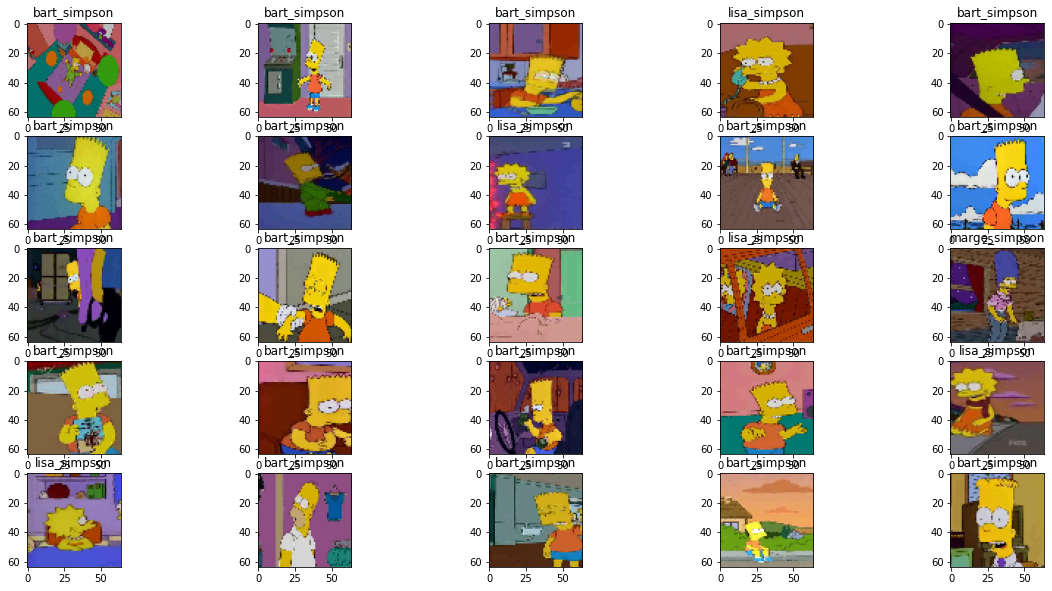

In [55]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    n = np.random.choice(X.shape[0])
    
    plt.imshow(X[n])
    plt.title(characters[np.argmax(y[n])])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

Проверим, что все классы присутствуют и в тесте и в треине

In [58]:
print(np.unique(ohe.inverse_transform(y_train), return_counts=True))
print(np.unique(ohe.inverse_transform(y_test), return_counts=True))

(array([0, 1, 2, 3]), array([1208, 1222,  113,   85]))
(array([0, 1, 2, 3]), array([134, 132,  15,  11]))


Построим модель

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam

def create_model_six_conv(input_shape):
    """
    CNN Keras model with 6 convolutions.
    :param input_shape: input shape, generally X_train.shape[1:]
    :return: Keras model, RMS prop optimizer
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(18, activation='softmax'))
    opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    return model, opt

def load_model_from_checkpoint(weights_path, input_shape=(64,64,3)):
    model, opt = create_model_six_conv(input_shape)
    model.load_weights(weights_path)
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [60]:
%time model = load_model_from_checkpoint(GLOBAL_PATH + 'weights.best.hdf5')

CPU times: user 585 ms, sys: 248 ms, total: 833 ms
Wall time: 26 s


In [0]:
#model.summary()

In [0]:
#model.layers = model.layers[1:-1]

In [0]:
model2 = Sequential()
for l in model.layers[:-4]:
  model2.add(l)
model2.add(Dense(1024, activation='relu'))
#model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

In [0]:
#model2.summary()

In [0]:
opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

es = EarlyStopping(patience=5, monitor='val_accuracy', mode='max')
mc = ModelCheckpoint('/content/weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')


# initialize the number of epochs and batch size
EPOCHS = 1000
BS = 32

image_gen_train = ImageDataGenerator(
                    rotation_range=20,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.3
                    )

g = image_gen_train.flow(X_train, y_train)
# construct the training image generator for data augmentation
#aug = ImageDataGenerator(rotation_range=20, 
#                         zoom_range=0.15, 
#                         width_shift_range=0.2, 
#                         height_shift_range=0.2, 
#                         shear_range=0.15,
#                          horizontal_flip=True, 
#                         fill_mode="nearest")#

#aug.fit(X_train)

In [0]:
#aug.fit(X_train)

In [0]:
#model2.fit(aug.flow(X_train,y_train_ohe, batch_size=BS), y_train_ohe, epochs=100, batch_size=32)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

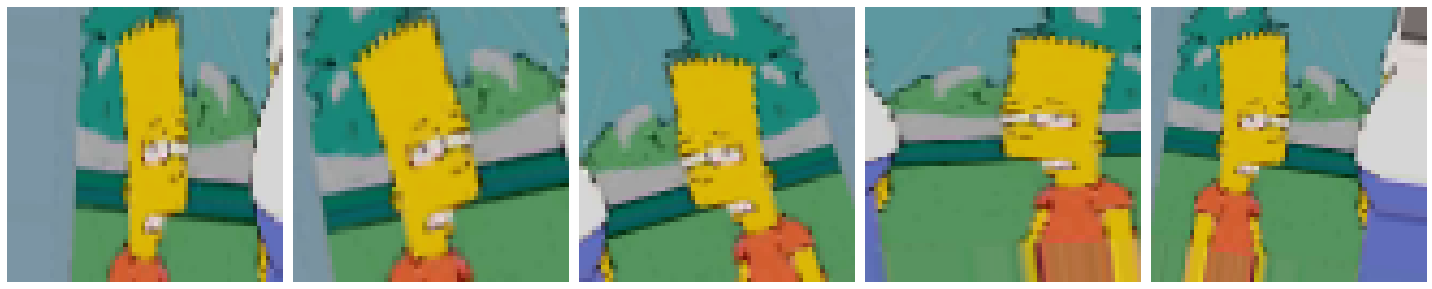

In [68]:
augmented_images = [g[5][0][20] for i in range(5)]
plotImages(augmented_images)

In [71]:
history = model2.fit(x=g, epochs=40, verbose=1, shuffle=True, validation_data=(X_test, y_test))

Epoch 1/40
83/83 [==============================] - 3s 38ms/step - loss: 0.1291 - accuracy: 0.9521 - val_loss: 0.1466 - val_accuracy: 0.9452
Epoch 2/40
83/83 [==============================] - 3s 36ms/step - loss: 0.1300 - accuracy: 0.9521 - val_loss: 0.1445 - val_accuracy: 0.9452
Epoch 3/40
83/83 [==============================] - 3s 38ms/step - loss: 0.1229 - accuracy: 0.9559 - val_loss: 0.1773 - val_accuracy: 0.9452
Epoch 4/40
83/83 [==============================] - 3s 36ms/step - loss: 0.1292 - accuracy: 0.9555 - val_loss: 0.1769 - val_accuracy: 0.9281
Epoch 5/40
83/83 [==============================] - 3s 37ms/step - loss: 0.1143 - accuracy: 0.9600 - val_loss: 0.1758 - val_accuracy: 0.9418
Epoch 6/40
83/83 [==============================] - 3s 37ms/step - loss: 0.1230 - accuracy: 0.9536 - val_loss: 0.1573 - val_accuracy: 0.9452
Epoch 7/40
83/83 [==============================] - 3s 36ms/step - loss: 0.1231 - accuracy: 0.9528 - val_loss: 0.1563 - val_accuracy: 0.9452
Epoch 8/40
83

KeyboardInterrupt: ignored

In [0]:
#history = model2.fit(x=augmented_images, y=y_train_ohe, batch_size=10, epochs=40, verbose=1, validation_split=0.1, shuffle=True)

In [0]:
tst_imgs = []

for imgpath in glob.glob('/content/data/test' + '/*.*'):
  
  im = cv2.imread(imgpath)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im,(64,64)).astype('float32') / 255.

  tst_imgs.append(im)

In [90]:
len(tst_imgs)

14

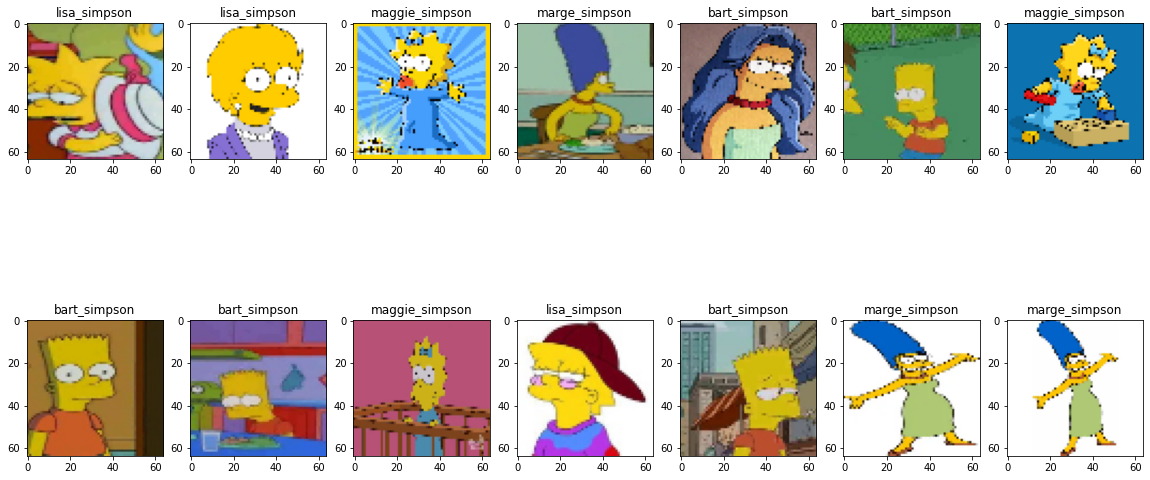

In [97]:
plt.figure(figsize=(20,10))

for i,im in enumerate(tst_imgs):
  plt.subplot(2,7,i+1)
  plt.imshow(im)
  plt.title(characters[np.argmax(model2.predict(im.reshape(1, 64, 64, 3)))])

In [0]:
im = cv2.imread('/content/data/test/liza_simpson.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im,(64,64)).astype('float32') / 255.

In [80]:
model2.predict(im.reshape(1, 64, 64, 3))

array([[2.6189648e-02, 9.7380596e-01, 2.3194802e-06, 2.0693983e-06]],
      dtype=float32)

Text(0.5, 1.0, 'lisa_simpson')

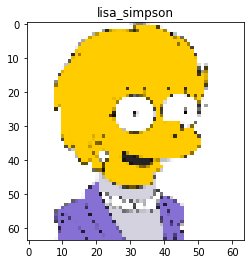

In [81]:
plt.imshow(im)
plt.title(characters[np.argmax(model2.predict(im.reshape(1, 64, 64, 3)))])

In [0]:
def map_chars(path):
  map_characters = {}
  i = 0
  for fold in glob.glob(path + '*', recursive=False):
    map_characters[i] = fold.split('/')[-1]
    i += 1
  return(map_characters)

def load_train_set(path, map_characters, size=(64, 64), n_samples=None):
  pics, labels = [], []
  time_start = time.time()
  
  for (i, char) in map_characters.items():
    print('Loading {}, time {}'.format(char, time.time() - time_start))
    for j, image_path in enumerate(glob.glob(path + char + '/*.*')):
      #print(image_path)
      temp = cv2.imread(image_path)
      temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
      temp = cv2.resize(temp,(size[0],size[1])).astype('float32') / 255.
      if (j % 10 == 0):
        print('\tStep {}:, time {}'.format(j, time.time() - time_start))
      if (j == n_samples):
        break
      pics.append(temp)
      labels.append(i)
  print('Done')
  return(np.array(pics), np.array(labels))


In [0]:
model2.save('/content/drive/My Drive/Colab Notebooks/hw/models/model_4classes.h5')

In [0]:
import keras

model_new = keras.models.load_model('my_weights.h5')

In [101]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)       